In [558]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sn
import pandas as pd
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

# Load Data
#### 1. Load in the dataset into pandas: `data/grad.csv`.

In [559]:
df = pd.read_csv('grad.csv')

In [560]:
df.head(5)

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4

#### 2. Use the pandas `describe` method to get some preliminary summary statistics on the data. In particular look at the mean values of the features.

In [561]:
df.describe()

admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000

#### 3. Use the pandas `crosstab` method to see how many applicants from each rank of school were accepted. You should get a dataframe that looks like this:

####    rank    1   2   3   4
####    admit
####    0      28  ..  ..  ..
####    1      33  ..  ..  ..

In [562]:
pd.crosstab(df['admit'], df['rank'])

rank    1   2   3   4
admit                
0      28  97  93  55
1      33  54  28  12

#### Make a bar plot of the percent of applicants from each rank who were accepted.  You can do `.plot(kind="bar")` on a pandas dataframe.
#### bar plot of the percent of applicants from each rank who were accepted

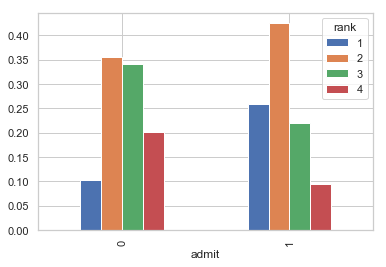

In [563]:
a = pd.crosstab(df['admit'], df['rank']).apply(lambda r: r/r.sum(), axis=1)
a.plot(kind="bar")

#### 4. What does the distribution of the GPA and GRE scores look like? Do the distributions differ much?
#### Hint: Use the pandas `hist` method.

In [564]:
pd.crosstab(df['admit'], df['gpa'])

gpa    2.26  2.42  2.48  2.52  2.55  2.56  2.62  2.63  2.65  2.67  ...   3.90  \
admit                                                              ...          
0         1     1     1     1     1     1     1     1     0     1  ...      2   
1         0     1     0     0     0     0     1     0     1     1  ...      1   

gpa    3.91  3.92  3.93  3.94  3.95  3.97  3.98  3.99  4.00  
admit                                                        
0         1     2     1     4     1     1     0     2    15  
1         0     0     0     1     4     0     1     1    13  

[2 rows x 132 columns]

#### 4. What does the distribution of the GPA and GRE scores look like? Do the distributions differ much?
#### Hint: Use the pandas `hist` method.
#### hist = df.hist(bins = 40)


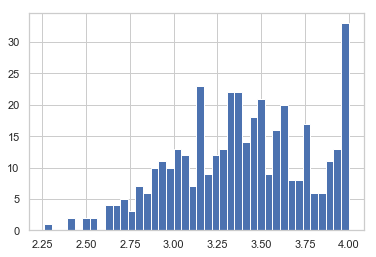

In [565]:
df['gpa'].hist(bins = 40)

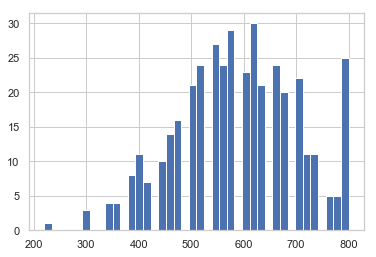

In [566]:
df['gre'].hist(bins = 40)

In [567]:
admit = df.admit
gpa = df.gpa
gre = df.gre
rank = df.rank

#### 5. Make a scatterplot of each predictor variable vs. the target (`admitted`).  
#### This can be tricky, because the target in a classification model can only take on two possible values. 
#### You may wish to add some random noise to the y-coordinates (also called "jitter") 
#### to make the data density easier to see.

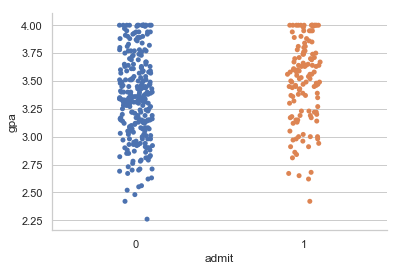

In [568]:
sn.stripplot(x=admit, y=gpa, data=df, jitter=True, 
              edgecolor='none') # remove the points' default edges 
sn.despine()

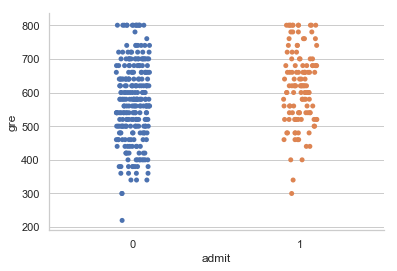

In [569]:
sn.stripplot(x=admit, y=gre, data=df, jitter=True, 
              edgecolor='none') # remove the points' default edges 
sn.despine()

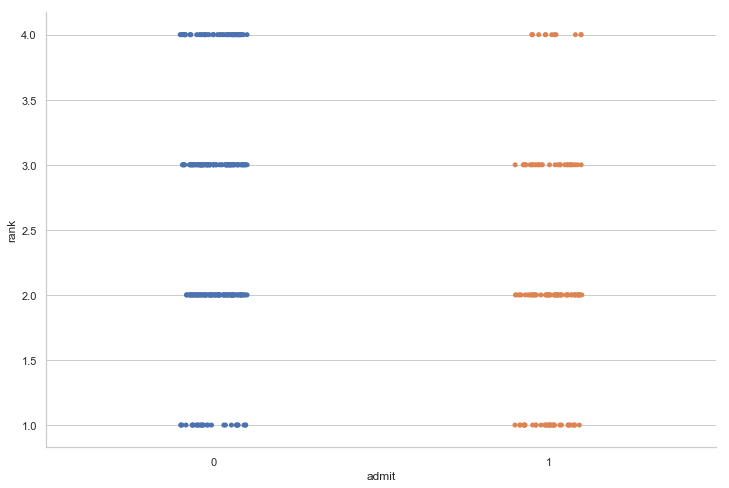

In [570]:
plt.figure(figsize = (12,8))
sn.stripplot(x=admit, y=df['rank'], data=df, jitter=True, 
              edgecolor='none') # remove the points' default edges 
sn.despine()

### Part 2: Predicting Graduate School Admissions
#### Now we're ready to try to fit our data with Logistic Regression.
1. Use sklearn to fit a [Logistic Regression] (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the raw data.  Your target variable should be admittance to graduate school.

In [571]:
#Create target variable and data

y = df.pop('admit') #Predictor
X = df #Dataset/predictors

In [572]:
y.head(3)

0    0
1    1
2    1
Name: admit, dtype: int64

In [573]:
X.head(3)

gre   gpa  rank
0  380  3.61     3
1  660  3.67     3
2  800  4.00     1

In [574]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [575]:
# Create logistic regression
model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [576]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [577]:
print(model.intercept_, model.coef_)


[-3.60691089] [[ 0.00141168  0.91279557 -0.50094898]]


#### 2. Once we feel comfortable with our model, we can move on to cross validation. Use sklearn's [KFold cross validation] (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and `LogisticRegression` to calculate the average log-loss across a 10 fold cross validation. Try to gridsearch across various hyperparameters to increase the predictive power of your model.

In [578]:
# Ridge = Ridge(random_state=0)
# alphas = np.logspace(-4, -0.5, 30)

# tuned_parameters = [{'alpha': alphas}]
# n_folds = 10

# clf = GridSearchCV(Ridge, tuned_parameters, cv=n_folds, refit=False)
# clf.fit(X, y)
# scores = clf.cv_results_['mean_test_score']
# #scores_std = clf.cv_results_['std_test_score']
# plt.figure().set_size_inches(8, 6)
# plt.semilogx(alphas, scores)

In [579]:
# scores

In [580]:
# alpha = alphas[np.argmin(scores)]
# alpha

In [581]:
# Create logistic regression
logistic = LogisticRegression()

In [582]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space - default 50
C = np.logspace(-4, 4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [583]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

In [584]:
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [585]:
# View best hyperparameters / C = 1 / lambda
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 5.428675439323859


In [586]:
# Predict target vector
best_model.predict(X)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

#### 3. Take some time to try to improve the models predictive power.  Make sure you use cross validation to evaluate whether adding in any predictors improves the model, as you cannot trust the training log-loss!  Here are some ideas:
  - Do some creative feature engineering.  Do you think any comparisons between the predictors could be predictive (i.e. a student with a good gpa but a poor gpa score, or the reverse)?
- Add some quadratic terms or other feature transformations / interactions.

In [587]:
log_loss(y, p_hat)

0.5755706774867128

In [588]:
p_hat

array([0.21528192, 0.31600518, 0.74000562, 0.13235548, 0.08999115,
       0.3631363 , 0.43308775, 0.25143769, 0.22730735, 0.54067174,
       0.29175482, 0.43675091, 0.7269552 , 0.35659048, 0.70663067,
       0.21773826, 0.26176136, 0.09378164, 0.5442657 , 0.60864614,
       0.18427857, 0.45914903, 0.09289031, 0.140213  , 0.43833376,
       0.67723956, 0.59768282, 0.16974947, 0.41796917, 0.48549125,
       0.17973397, 0.2906522 , 0.24704072, 0.43964939, 0.38707273,
       0.24640832, 0.50155831, 0.15494218, 0.29334327, 0.1308311 ,
       0.19533406, 0.36001751, 0.33306714, 0.20390176, 0.32833319,
       0.21360798, 0.38942068, 0.0901948 , 0.05463986, 0.18345126,
       0.34633232, 0.0938134 , 0.17480334, 0.38859975, 0.25576311,
       0.41514447, 0.20269468, 0.13076916, 0.35897132, 0.09289031,
       0.34659064, 0.13041943, 0.30883399, 0.35953138, 0.35210177,
       0.42560865, 0.20952659, 0.5294254 , 0.59887693, 0.69080485,
       0.37527319, 0.06356968, 0.12260141, 0.50861866, 0.18040

In [589]:
y == y_hat

0       True
1      False
2       True
3      False
4       True
5      False
6      False
7       True
8      False
9      False
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18     False
19      True
20      True
21     False
22      True
23      True
24     False
25      True
26      True
27     False
28     False
29      True
       ...  
370    False
371    False
372    False
373     True
374     True
375     True
376     True
377     True
378     True
379     True
380     True
381    False
382     True
383    False
384    False
385     True
386     True
387     True
388     True
389     True
390    False
391     True
392    False
393    False
394    False
395    False
396     True
397     True
398     True
399     True
Name: admit, Length: 400, dtype: bool

In [590]:
pred_neg = (y==y_hat)[p_hat < 0.5]
pred_pos = (y==y_hat)[p_hat > 0.5]

In [591]:
TN, FN = pred_neg.sum(), (~pred_neg).sum()
TP, FP = pred_pos.sum(), (~pred_pos).sum()

In [592]:
TN, FN, TP, FP

(247, 91, 36, 26)

In [593]:
accuracy = (TP + TN)/len(X)
accuracy

0.7075

In [594]:
df.head(3)

gre   gpa  rank
0  380  3.61     3
1  660  3.67     3
2  800  4.00     1

#### 4. The `rank` column is ordinal where we assume an equal change between ranking levels, but we could also consider it to be more generally categorical. Use panda's [get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.reshape.get_dummies.html) to binarize the column.

In [607]:
pd.get_dummies(['rank'])

rank
0     1

In [608]:
df

gre   gpa  rank
0    380  3.61     3
1    660  3.67     3
2    800  4.00     1
3    640  3.19     4
4    520  2.93     4
5    760  3.00     2
6    560  2.98     1
7    400  3.08     2
8    540  3.39     3
9    700  3.92     2
10   800  4.00     4
11   440  3.22     1
12   760  4.00     1
13   700  3.08     2
14   700  4.00     1
15   480  3.44     3
16   780  3.87     4
17   360  2.56     3
18   800  3.75     2
19   540  3.81     1
20   500  3.17     3
21   660  3.63     2
22   600  2.82     4
23   680  3.19     4
24   760  3.35     2
25   800  3.66     1
26   620  3.61     1
27   520  3.74     4
28   780  3.22     2
29   520  3.29     1
..   ...   ...   ...
370  540  3.77     2
371  680  3.76     3
372  680  2.42     1
373  620  3.37     1
374  560  3.78     2
375  560  3.49     4
376  620  3.63     2
377  800  4.00     2
378  640  3.12     3
379  540  2.70     2
380  700  3.65     2
381  540  3.49     2
382  540  3.51     2
383  660  4.00     1
384  480  2.62     2
385  420  3.02     1
386  740  3.86     2
387  580  3.36     2
388  640  3.17     2
389  640  3.51     2
390  800  3.05     2
391  660  3.88     2
392  600  3.38     3
393  620  3.75     2
394  460  3.99     3
395  620  4.00     2
396  560  3.04     3
397  460  2.63     2
398  700  3.65     2
399  600  3.89     3

[400 rows x 3 columns]

In [596]:
betas = []
scores_train = []
scores_val = []
#alphas = [10**i for i in range(-5, 8)]
alphas = np.linspace(0, 100)
for alpha in alphas:
    tk_scores = []
    vk_scores = []
    bk_values = []
    for train_index, validation_index in kf.split(X_train):
        # split data into train and validation sets
        Xt = X_train[train_index]
        yt = y_train.iloc[train_index]
        Xv = X_train[validation_index]
        yv = y_train.iloc[validation_index]

KeyError: '[ 28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45\n  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63\n  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81\n  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99\n 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117\n 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135\n 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153\n 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171\n 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189\n 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207\n 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225\n 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243\n 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261\n 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279] not in index'

#### 5. Compute the log-loss after categorizing the `rank` column. Does it do better or worse with the rank column binarized?

    From now on, use the version of the feature matrix that performed the best.

#### 6. Say we are using this as a first step in the application process. We want to weed out clearly unqualified candidates, but not reject too many candidates. How may we use the predicted probabilities from our model to accomplish this?

#### 7. Plot your final ROC curve, what should the cutoff be? What is the AUC score?

In [ ]:
roc_score_

In [597]:
import math

def sigmoid(B):
      return 1 / (1 + math.exp(-B))

In [598]:
sigmoid(0.5)

0.6224593312018546

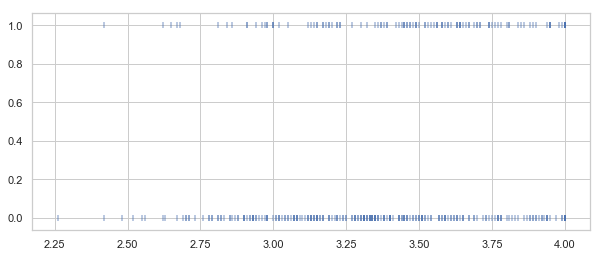

In [599]:
# for later


plt.figure(figsize = (10,4))
plt.scatter(gpa, admit, marker = '|', alpha = 0.5)